In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
bio = pd.read_csv('../Data/clean_biodiversity_nogroupby.csv')
bio.head()

,Unnamed: 0,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,4,sechellarum,Seychelles magpie robin,Seychelles,Africa,-4.58333,55.93333,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6,ochropectus,Djibouti francolin,Djibouti,Africa,11.76667,42.65806,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,coprotheres,Cape griffon / Cape vulture,Botswana,Africa,-22.00000,24.00000,Terrestrial,Individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8,coprotheres,Cape griffon / Cape vulture,Lesotho,Africa,-29.50000,28.25000,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9,coprotheres,Cape griffon / Cape vulture,Mozambique,Africa,-18.25000,35.00000,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bio.count() #data starts to be larger in 1967

Unnamed: 0     3235
ID             3235
Species        3235
Common_name    3235
Country        3235
Region         3235
Latitude       3235
Longitude      3235
System         3235
Units          3235
1950             27
1951             18
1952             19
1953             24
1954             23
1955             25
1956             31
1957             33
1958             35
1959             62
1960             59
1961             89
1962            105
1963             79
1964             87
1965            152
1966            109
1967            133
1968            132
1969            136
               ... 
1986            635
1987            663
1988            640
1989            787
1990            909
1991            885
1992            910
1993            940
1994           1005
1995           1041
1996           1093
1997           1145
1998           1070
1999           1141
2000           1209
2001           1036
2002           1005
2003            940
2004            920


In [7]:
#looking the csv file to find nice timeline with full datapoint
bio1970_2004 = bio.loc[:,'1967':'2004'] 
bioheaders = bio.loc[:,'ID':'Units']
bio1 = bioheaders.join(bio1970_2004)
bio1.head()

#get more data by decreasing window
bio1974_2002 = bio.loc[:,'1974':'2002']
bioheaders = bio.loc[:,'ID':'Units']
bio2 = bioheaders.join(bio1974_2002)
bio2.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
0,4,sechellarum,Seychelles magpie robin,Seychelles,Africa,-4.58333,55.93333,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,ochropectus,Djibouti francolin,Djibouti,Africa,11.76667,42.65806,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,NaN,NaN
2,7,coprotheres,Cape griffon / Cape vulture,Botswana,Africa,-22.00000,24.00000,Terrestrial,Individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704.0,NaN,NaN
3,8,coprotheres,Cape griffon / Cape vulture,Lesotho,Africa,-29.50000,28.25000,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815.0,NaN,NaN
4,9,coprotheres,Cape griffon / Cape vulture,Mozambique,Africa,-18.25000,35.00000,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [8]:
#drop NaN value
bio1.dropna(inplace=True)
bio1.head()

bio2.dropna(inplace=True)
bio2.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
74,111,africana,African elephant,South Africa,Africa,-23.83333,31.50000,Terrestrial,Individuals,7800.0,...,7600.0,7900.0,8100.0,8300.0,8300.0,9000.0,9300.0,8500.0,9400.0,10500.0
441,1171,acuta,Common pintail / Northern pintail,France,Europe,51.79000,2.76167,Freshwater,Population estimate,52973.0,...,44467.0,47878.0,56862.0,52399.0,56549.0,37513.0,58240.0,52269.0,54707.0,71279.0
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,893.0,...,557.0,666.0,699.0,1935.0,890.0,1391.0,1041.0,954.0,1536.0,2104.0
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,563.0,...,959.0,1303.0,1253.0,1933.0,2207.0,1419.0,1704.0,1428.0,1648.0,1204.0
448,1179,crecca,Common teal / Green-winged teal,France,Europe,51.79000,2.76167,Freshwater,Population estimate,165982.0,...,253709.0,281561.0,348371.0,322939.0,250732.0,282381.0,347012.0,346010.0,416927.0,402369.0


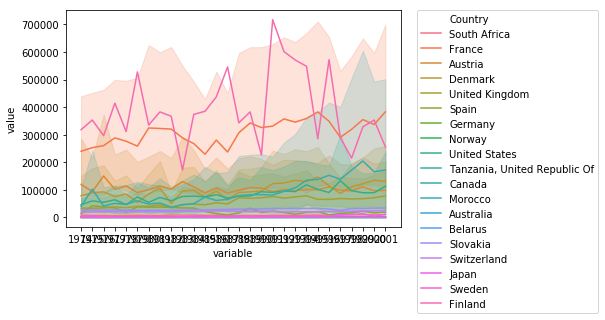

In [10]:
#melt data, to have years in one column
c = np.arange(1974,2002,1)
c = c.tolist()
c = map(str,c)
print(c)

bio2melt = pd.melt(bio2, id_vars='Country', value_vars=c)


sns.lineplot(x='variable', y='value', data=bio2melt, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#would be easier to compare with a percentage instead

In [11]:
#creating a percentage for biodiversity data

bio2['1975']=bio2['1975']/bio2['1974']*100
bio2['1976']=bio2['1976']/bio2['1974']*100
bio2['1977']=bio2['1977']/bio2['1974']*100
bio2['1978']=bio2['1978']/bio2['1974']*100
bio2['1979']=bio2['1979']/bio2['1974']*100
bio2['1980']=bio2['1980']/bio2['1974']*100
bio2['1981']=bio2['1981']/bio2['1974']*100
bio2['1982']=bio2['1982']/bio2['1974']*100
bio2['1983']=bio2['1983']/bio2['1974']*100
bio2['1984']=bio2['1984']/bio2['1974']*100
bio2['1985']=bio2['1985']/bio2['1974']*100
bio2['1986']=bio2['1986']/bio2['1974']*100
bio2['1987']=bio2['1987']/bio2['1974']*100
bio2['1988']=bio2['1988']/bio2['1974']*100
bio2['1989']=bio2['1989']/bio2['1974']*100
bio2['1990']=bio2['1990']/bio2['1974']*100
bio2['1991']=bio2['1991']/bio2['1974']*100
bio2['1992']=bio2['1992']/bio2['1974']*100
bio2['1993']=bio2['1993']/bio2['1974']*100
bio2['1994']=bio2['1994']/bio2['1974']*100
bio2['1995']=bio2['1995']/bio2['1974']*100
bio2['1996']=bio2['1996']/bio2['1974']*100
bio2['1997']=bio2['1997']/bio2['1974']*100
bio2['1998']=bio2['1998']/bio2['1974']*100
bio2['1999']=bio2['1999']/bio2['1974']*100
bio2['2000']=bio2['2000']/bio2['1974']*100
bio2['2001']=bio2['2001']/bio2['1974']*100
bio2['2002']=bio2['2002']/bio2['1974']*100

In [12]:
#do not re-run
bio2['1974']=bio2['1974']/bio2['1974']*100
bio2.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
74,111,africana,African elephant,South Africa,Africa,-23.83333,31.50000,Terrestrial,Individuals,100.0,...,97.435897,101.282051,103.846154,106.410256,106.410256,115.384615,119.230769,108.974359,120.512821,134.615385
441,1171,acuta,Common pintail / Northern pintail,France,Europe,51.79000,2.76167,Freshwater,Population estimate,100.0,...,83.942763,90.381893,107.341476,98.916429,106.750609,70.815321,109.942801,98.671021,103.273366,134.557227
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,62.374020,74.580067,78.275476,216.685330,99.664054,155.767077,116.573348,106.830907,172.004479,235.610302
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,170.337478,231.438721,222.557726,343.339254,392.007105,252.042629,302.664298,253.641208,292.717584,213.854352
448,1179,crecca,Common teal / Green-winged teal,France,Europe,51.79000,2.76167,Freshwater,Population estimate,100.0,...,152.853321,169.633454,209.884807,194.562663,151.059753,170.127484,209.066043,208.462363,251.188081,242.417250
449,1180,crecca,Common teal / Green-winged teal,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,82.287087,96.056747,91.927662,135.335177,69.097584,168.671532,157.748266,95.825590,128.155736,87.970811
454,1187,penelope,Eurasian wigeon,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,245.849298,574.968072,472.796935,468.710089,355.683269,558.620690,563.601533,574.840358,727.969349,800.766284
455,1188,penelope,Eurasian wigeon,France,Europe,51.79000,2.76167,Freshwater,Population estimate,100.0,...,222.255814,257.988259,300.634589,265.160190,215.452442,245.032619,256.032410,232.218159,284.629037,270.085199
457,1191,platyrhynchos,Mallard / Common mallard,France,Europe,50.06000,6.67000,Freshwater,Population estimate,100.0,...,120.063996,114.123612,109.246890,94.266413,86.554072,93.239168,109.682203,103.860337,115.748593,114.628294
459,1193,platyrhynchos,Mallard / Common mallard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,58.553081,56.399894,53.092338,56.647145,42.159121,51.113084,62.344199,55.041137,57.375590,59.019160


In [13]:
#type of animals for each country
bio2[bio2['Country'] == 'France'] # 11 freshwater
bio2[bio2['Country'] == 'Canada'] #1 terrestrial 4 freshwater
bio2[bio2['Country'] == 'United States'] #3 terrestrials 3 freshwater
bio2[bio2['Country'] == 'Austria'] #11 freshwater

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,62.374020,74.580067,78.275476,216.685330,99.664054,155.767077,116.573348,106.830907,172.004479,235.610302
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,170.337478,231.438721,222.557726,343.339254,392.007105,252.042629,302.664298,253.641208,292.717584,213.854352
449,1180,crecca,Common teal / Green-winged teal,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,82.287087,96.056747,91.927662,135.335177,69.097584,168.671532,157.748266,95.825590,128.155736,87.970811
454,1187,penelope,Eurasian wigeon,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,245.849298,574.968072,472.796935,468.710089,355.683269,558.620690,563.601533,574.840358,727.969349,800.766284
459,1193,platyrhynchos,Mallard / Common mallard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,58.553081,56.399894,53.092338,56.647145,42.159121,51.113084,62.344199,55.041137,57.375590,59.019160
463,1201,strepera,Gadwall,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,362.132867,443.671329,526.923077,800.594406,672.027972,795.839161,822.447552,562.167832,844.265734,716.013986
481,1235,ferina,Common pochard / European pochard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,90.552808,103.136763,120.408081,129.092385,148.281322,103.144814,116.805668,90.799724,107.061910,104.580680
486,1243,fuligula,Tufted duck,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,166.612864,178.812381,181.549722,202.150079,190.702786,164.160271,180.167601,167.811751,148.537682,162.279713
492,1271,clangula,Common goldeneye,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,92.121467,117.541242,93.720710,103.732269,132.644741,106.455816,118.806347,116.622885,97.318483,107.823894
497,1283,cygnus,Whooper swan,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,509.352518,383.453237,411.510791,563.309353,628.776978,454.676259,461.870504,341.726619,456.115108,698.561151


In [14]:
# Countries with full datasets over 1967-2004
'Canada, United Kingdom, United States, Slovakia, Norway, Tanzania, South Africa'

#Countries added if reduced time to 1974-2002
'France,Denmark,Austria'

'France,Denmark,Austria'

Text(0,0.5,'Percent of individuals compared to 1974 (%)')

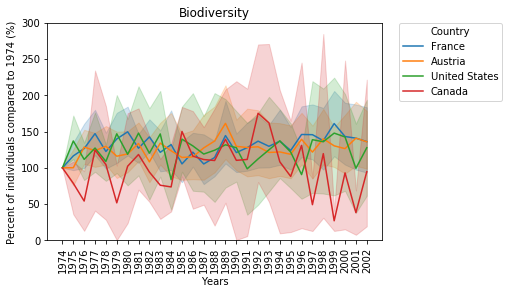

In [15]:
####################################FINAL PLOT!!!!#############################################

#melt data
c = np.arange(1974,2003,1)
c = c.tolist()
c = map(str,c)
print(c)

bio2melt = pd.melt(bio2, id_vars='Country', value_vars=c)

#focusing on Canada, United States, France and Austria
bio2spe = bio2melt[(bio2melt.Country == 'Canada') |(bio2melt.Country == 'United States') | (bio2melt.Country == 'France')| (bio2melt.Country == 'Austria')]
#removing outliers
bio2spe = bio2spe[bio2spe["value"] < 300]

#plotting
plt.ylim(0,300)
plt.title("Biodiversity")
sns.lineplot(x='variable', y='value', data=bio2spe, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(0,29,1),np.arange(1974,2003,1),rotation=90)
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

In [18]:
#saving the csv file of all countries 
#removing outliers
bio2melt = bio2melt[bio2melt["value"] < 300]

#grouping by Country and year, keeping the mean value
bio2meltgroup = bio2melt.groupby(['Country','variable'])['value'].mean()
bio2meltgroup = bio2meltgroup.reset_index()
bio2meltgroup_df = pd.DataFrame(bio2meltgroup)

#saving to a csv file
bio2meltgroup_df.to_csv('../Data/biodiversitytomergemean.csv')

/Users/delphinealbrecht/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The linear regression slope for Canada is 0.43381619649201986, but does not fit the data
The linear regression slope for Canada is 2.2947492957643614 between 1974 and 1992
The linear regression slope for Canada is -10.034617590143702 between 1992 and 2004


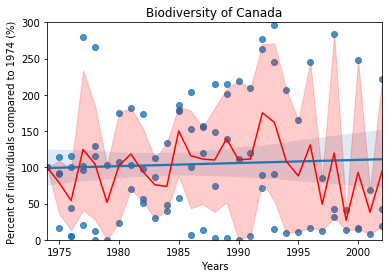

In [28]:
#########FINAL PLOT individual plots with regression for Canada
Canada = bio2melt[(bio2melt.Country == 'Canada')]
Canada['variable'] = pd.to_numeric(Canada['variable'])
sns.regplot(x='variable', y='value', data=Canada,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=Canada, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of Canada")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")
slope, intercept,r_value, p_value, std_err = linregress(x=Canada['variable'], y=Canada['value'])
fit = slope * Canada['variable'] + intercept

#split in 2
firstCanada = Canada[Canada["variable"] < 1992]
firstslope, firstintercept,firstr_value, firstp_value, firststd_err = linregress(x=firstCanada['variable'], y=firstCanada['value'])
firstfit = slope * firstCanada['variable'] + intercept

secondCanada = Canada[Canada["variable"] >= 1992]
secondslope, secondintercept,secondr_value, secondp_value, secondstd_err = linregress(x=secondCanada['variable'], y=secondCanada['value'])
secondfit = slope * secondCanada['variable'] + intercept

print(f'The linear regression slope for Canada is {slope}, but does not fit the data') #linera model doesn't fit
print(f'The linear regression slope for Canada is {firstslope} between 1974 and 1992')
print(f'The linear regression slope for Canada is {secondslope} between 1992 and 2004')

/Users/delphinealbrecht/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Linear regression slope is 0.7328460831420389


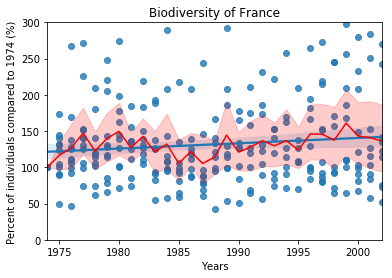

In [22]:
#########FINAL PLOT individual plots with regression for France
France = bio2melt[(bio2melt.Country == 'France')]
France['variable'] = pd.to_numeric(France['variable'])
sns.regplot(x='variable', y='value', data=France,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=France, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of France")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

slope, intercept,r_value, p_value, std_err = linregress(x=France['variable'], y=France['value'])
fit = slope * France['variable'] + intercept
r_squared = r_value ** 2

print(f'The linear regression slope for France is {slope}')

/Users/delphinealbrecht/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The linear regression slope for the United States is 0.21209902712176953


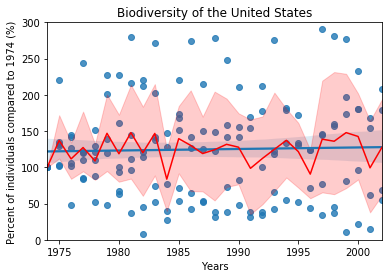

In [24]:
#########FINAL PLOT individual plots with regression for the United States
United_States = bio2melt[(bio2melt.Country == 'United States')]
United_States['variable'] = pd.to_numeric(United_States['variable'])
sns.regplot(x='variable', y='value', data=United_States,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=United_States, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of the United States")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

slope, intercept,r_value, p_value, std_err = linregress(x=United_States['variable'], y=United_States['value'])
fit = slope * United_States['variable'] + intercept
r_squared = r_value ** 2

print(f'The linear regression slope for the United States is {slope}')

/Users/delphinealbrecht/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The linear regression slope for Austria is 0.7335316602737256


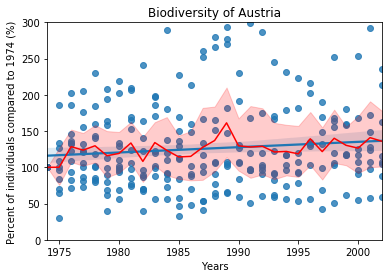

In [25]:
#########FINAL PLOT individual plots with regression for Austria
Austria = bio2melt[(bio2melt.Country == 'Austria')]
Austria['variable'] = pd.to_numeric(Austria['variable'])
sns.regplot(x='variable', y='value', data=Austria,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=Austria, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of Austria")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

slope, intercept,r_value, p_value, std_err = linregress(x=Austria['variable'], y=Austria['value'])
fit = slope * Austria['variable'] + intercept
r_squared = r_value ** 2

print(f'The linear regression slope for Austria is {slope}')